<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S2_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 2
## Generation models and graph layout algorithms

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

opt = { 'node_size': 20,
        'width': 2,
        'font_size': 5,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'gray',
        'node_color': 'orange'}

In [50]:
examples = [ (nx.generators.classic.complete_graph(12), 'nxcomplete'),
             (nx.generators.lattice.triangular_lattice_graph(5, 4), 'nxtri'),
             (nx.generators.lattice.grid_2d_graph(5, 4), 'nxsquare'),
             (nx.generators.lattice.hexagonal_lattice_graph(3, 3), 'nxhex'),
             (nx.generators.random_graphs.connected_watts_strogatz_graph(20, 4, 0.15), 'nxws'),
             (nx.generators.random_graphs.random_regular_graph(3, 16), 'nxregular'),
             (nx.generators.random_graphs.gnm_random_graph(20, 35), 'nxerdos'),
             (nx.generators.classic.circular_ladder_graph(12), 'nxcirc'),
             (nx.generators.classic.ladder_graph(12), 'nxladder'),
             (nx.generators.random_graphs.barabasi_albert_graph(15, 3), 'nxba'),
             (nx.generators.random_graphs.powerlaw_cluster_graph(20, 4, 0.15), 'nxtree'),
             (nx.generators.classic.star_graph(20), 'nxstar'),
             (nx.generators.classic.barbell_graph(6, 2), 'nxbarbell'),
             (nx.generators.classic.wheel_graph(12), 'nxwheel'),
             (nx.generators.classic.path_graph(12), 'nxpath') ]

layouts = [ (nx.spectral_layout, 'spectral'),
            (nx.kamada_kawai_layout, 'KK'),
            (nx.spring_layout, 'spring'),
            (nx.circular_layout, 'circular') ]

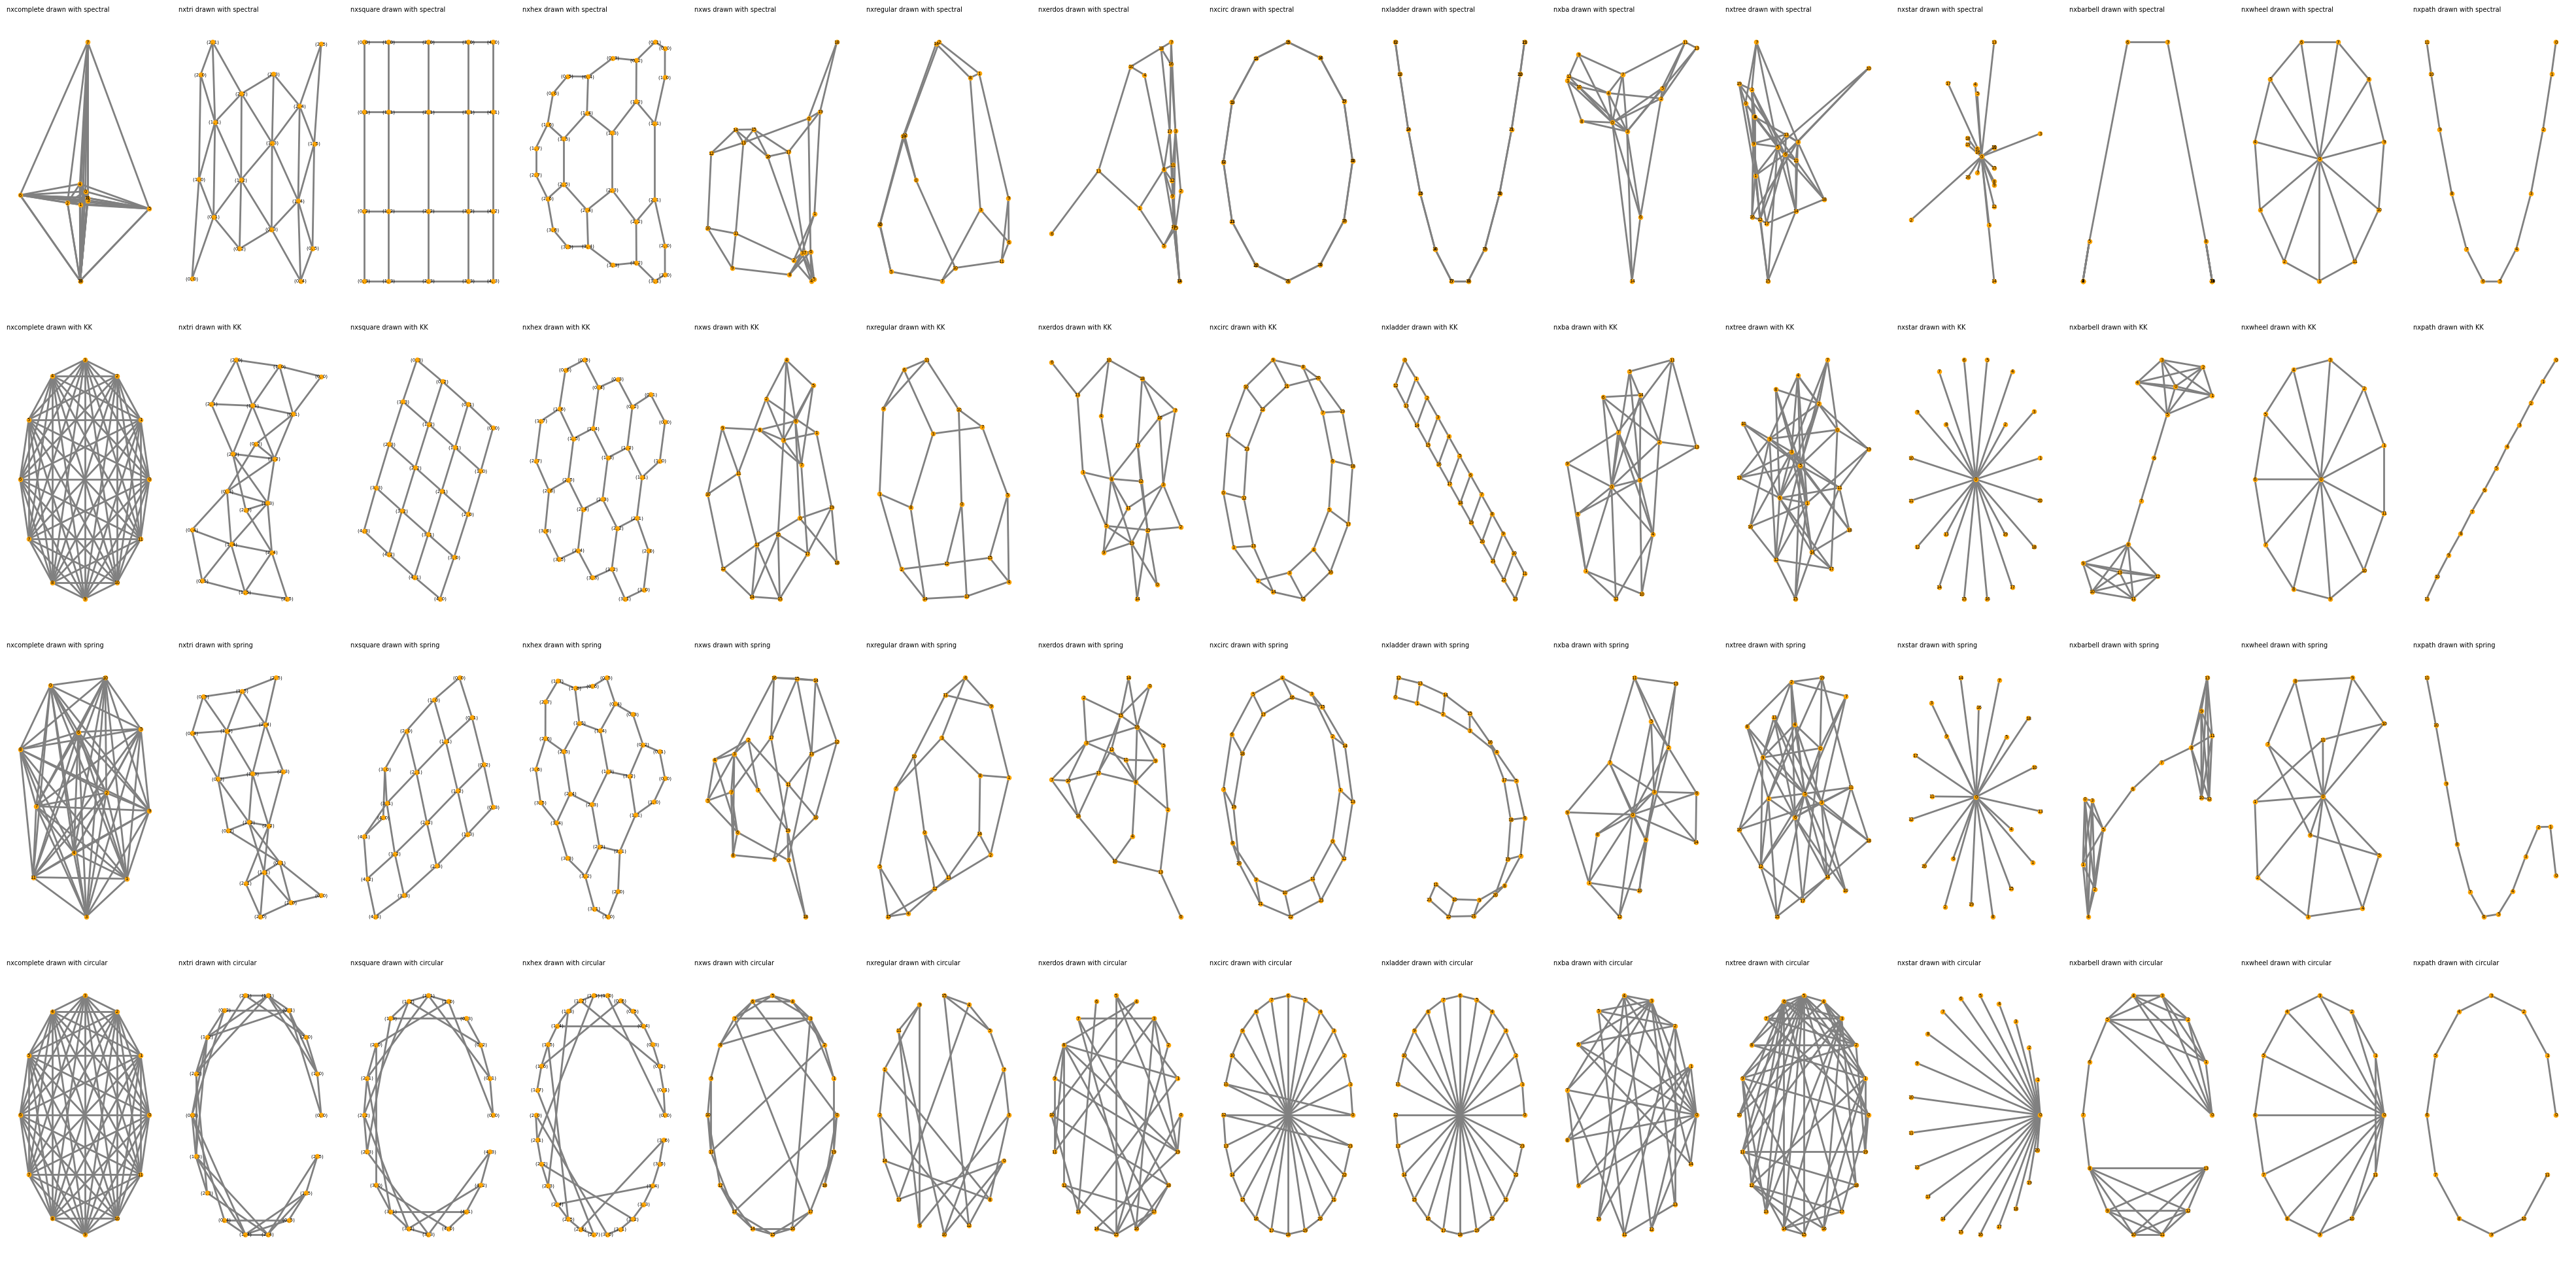

In [69]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout = False, figsize = (40, 20))

rows = len(layouts)
cols = len(examples)
gs = GridSpec(rows, cols, figure = fig, wspace = 0.1, hspace = 0.1)

plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.95, bottom = 0, right = 1, left = 0.02, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

row = 0
col = 0
for (l, ll) in layouts:
  for (G, gl) in examples:
    ax = fig.add_subplot(gs[row, col])
    col += 1
    if col == cols:
      row += 1
      col = 0
    nx.draw(G, pos = l(G), ax = ax, **opt)
    _ = ax.axis('off')
    plt.title(gl + ' drawn with ' + ll, loc = 'left', fontsize = 7)
fig.show()

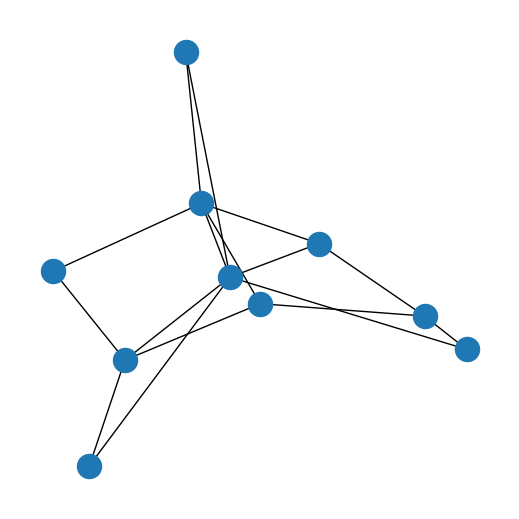

In [36]:
from networkx.generators.random_graphs import powerlaw_cluster_graph
plt.rcParams["figure.figsize"] = (5, 5)
G = powerlaw_cluster_graph(10, 2, 0.05)
c1 = nx.spectral_layout(G)
nx.draw(G, pos = c1)

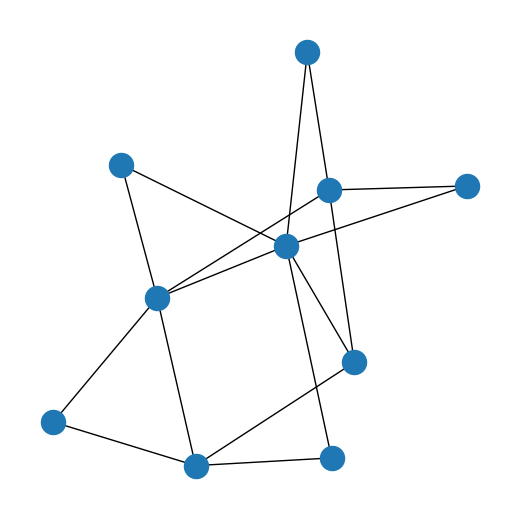

In [29]:
c2 = nx.kamada_kawai_layout(G, scale = 3) # another layout
nx.draw(G, pos = c2)

How to put these pictures in LaTeX?

In [9]:
!pip install network2tikz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 1.1 MB/s eta 0:00:00


In [17]:
from network2tikz import plot
import pydot
import networkx.drawing

In [22]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [23]:
!pip install pygraphviz

  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175926 sha256=f34128924c0abc4240074122526757178f034c7b2ecd02f6a8e2b2c913516587
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz


In [30]:
coords = networkx.drawing.nx_agraph.graphviz_layout(G, prog = "dot")

opt = {}
opt['node_label'] = [ f'N{v}' for v in G.nodes() ]
opt['node_color'] = 'pink'
opt['node_opacity'] = 0.95
opt['edge_curved'] = 0.8

plot( (G.nodes(), G.edges()), 'temp.tex', **opt)

What does this file contain?

In [34]:
with open('temp.tex') as source:
  for line in source:
    print(line.strip())

\documentclass{standalone}
\usepackage{tikz-network}
\begin{document}
\begin{tikzpicture}
\clip (0,0) rectangle (6,6);
\Vertex[x=3.011,y=2.590,color=pink,opacity=0.95,label=N0]{0}
\Vertex[x=4.982,y=4.773,color=pink,opacity=0.95,label=N1]{1}
\Vertex[x=5.650,y=3.058,color=pink,opacity=0.95,label=N2]{2}
\Vertex[x=2.866,y=2.700,color=pink,opacity=0.95,label=N3]{3}
\Vertex[x=1.048,y=1.371,color=pink,opacity=0.95,label=N4]{4}
\Vertex[x=2.260,y=0.940,color=pink,opacity=0.95,label=N5]{5}
\Vertex[x=2.003,y=0.970,color=pink,opacity=0.95,label=N6]{6}
\Vertex[x=3.006,y=3.100,color=pink,opacity=0.95,label=N7]{7}
\Vertex[x=0.708,y=5.060,color=pink,opacity=0.95,label=N8]{8}
\Vertex[x=0.350,y=3.880,color=pink,opacity=0.95,label=N9]{9}
\Edge[,bend=-50.194](0)(2)
\Edge[,bend=-50.194](0)(3)
\Edge[,bend=-50.194](0)(4)
\Edge[,bend=-50.194](0)(6)
\Edge[,bend=-50.194](0)(8)
\Edge[,bend=-50.194](0)(9)
\Edge[,bend=-50.194](1)(2)
\Edge[,bend=-50.194](1)(3)
\Edge[,bend=-50.194](1)(4)
\Edge[,bend=-50.194](1)(8)
\